In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import dask
import holoviews as hv
import hvplot.xarray
import cftime

import ismip6_index, grid_utils

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
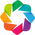

In [2]:
hv.extension('bokeh')

## Loading ISMIP6 Antarctica outputs

* ISMIP6 Antarctica outputs are ~1.1 TB in total. Officially, they are available through Globus, but we've pulled the whole dataset and put it on GCloud at `gs://ismip6/`.
* Following CMIP conventinos, every variable is a separate NetCDF file. Nominally, these are CF-compliant and follow a standardized set of file and variable naming rules, but, following CMIP conventions 🙂, there are a scattering of errors. See the [ISMIP6 output specifications](https://theghub.org/groups/ismip6/wiki/MainPage/ISMIP6ProjectionsAntarctica).
* All of the outputs are uniform rectangular grids in EPSG:3031 project, but there are multiple resolutions.

Ideally, (lazy) loading the outputs might look something like this, leveraging the patterns established by [xarray](https://github.com/pydata/xarray), [intake-esm](https://github.com/intake/intake-esm), and [xMIP](https://github.com/jbusecke/xMIP):

Note: This is not runnable code. This is a concept of what it *should* look like. See the next cell for currently-runnable code.

```python
ismip6_cat = intake.open_esm_datastore('gs://ismip6/ismip6.json')
ismip6_dt = ismip6_cat.to_datatree(preprocess=xmip.fix_ismip6)
```

In reality, it's a bit more complicated today. The main issues are inconsitencies in the output files. For example:
* A few files are mis-named (missing an underscore) (corrected by `ismip6_index.get_file_index()`)
* Some grids were defined with `x` and `y` coordiantes (in EPSG:3031 projection) while others were specified by `lat`, `lon` points (corrected by `grid_utils.correct_grid_coordinates()`)
* Timestamps are specified in a variety of different formats (fixed in-line below)
* Some outputs are actually NetCDF3 files, which we currently don't support loading here

The code below actually runs and produces a DataTree with a subset of the outputs:

In [3]:
# Create a dataframe index by scanning the ISMIP6 Antarctica output files
# This is ~200 lines of code to build an index of ISMIP6 data files from the filenames
ismip6_df = ismip6_index.get_file_index()

# For the purposes of this demo, filter down the number of files we have to load
ismip6_df = ismip6_df.query('experiment in ["ctrl_proj_std", "exp05"] and variable in ["lithk", "litempbotgr"]')

# Build a DataTree of the outputs
datasets = {}
for _, row in ismip6_df.iterrows():
    try:
        p = f'{row["institution"]}_{row["model_name"]}/{row["experiment"]}/{row["variable"]}' # DataTree path
        ds = xr.open_dataset(row["url"], engine='h5netcdf', decode_cf=True, decode_times=True, chunks={'time': 1})
        ds = grid_utils.correct_grid_coordinates(ds, data_var=row["variable"])
        
        # Convert time coordinate to cftime.DatetimeNoLeap for consistency
        if 'time' in ds.coords:
            time_vals = ds.time.values
            if not isinstance(time_vals[0], cftime.DatetimeNoLeap):
                time_pd = pd.to_datetime(time_vals)
                new_time = [cftime.DatetimeNoLeap(t.year, t.month, t.day, t.hour, t.minute, t.second) for t in time_pd]
                ds = ds.assign_coords(time=new_time)
            # Remove duplicate time values if present
            _, unique_indices = np.unique(ds.time.values, return_index=True)
            if len(unique_indices) < len(ds.time):
                print(f"Warning: Found duplicate time values, keeping only unique times")
                ds = ds.isel(time=sorted(unique_indices))

        datasets[p] = ds
    except Exception as e:
        print(f"Failed to load {p}: {e}")
ismip6_dt = xr.DataTree.from_dict(datasets)

ismip6_dt

Loading index from cache: .cache/ismip6_index.parquet
Failed to load ILTS_PIK_SICOPOLIS1/ctrl_proj_std/litempbotgr: b'CDF\x01\x00\x00\x00V' is not the signature of a valid netCDF4 file
Failed to load ILTS_PIK_SICOPOLIS1/ctrl_proj_std/lithk: b'CDF\x01\x00\x00\x00V' is not the signature of a valid netCDF4 file
Failed to load ILTS_PIK_SICOPOLIS1/exp05/litempbotgr: b'CDF\x01\x00\x00\x00V' is not the signature of a valid netCDF4 file
Failed to load ILTS_PIK_SICOPOLIS1/exp05/lithk: b'CDF\x01\x00\x00\x00V' is not the signature of a valid netCDF4 file
⚠️  Grid correction: Dataset missing x/y coordinates for 'lithk'
   Detected dimensions: y=761, x=761
   Estimated resolution: dx=8.0 km, dy=8.0 km
   Creating coordinates: x=[-3040.0, 3040.0] km, y=[-3040.0, 3040.0] km
   Verifying consistency with existing lat/lon coordinates...
   ✓ Coordinates are consistent with lat/lon
   ✓ Grid correction complete

⚠️  Grid correction: Dataset missing x/y coordinates for 'lithk'
   Detected dimensions: y=7

<xarray.DataTree>
Group: /
├── Group: /AWI_PISM1
│   ├── Group: /AWI_PISM1/ctrl_proj_std
│   │   ├── Group: /AWI_PISM1/ctrl_proj_std/litempbotgr
│   │   │       Dimensions:      (time: 86, y: 761, x: 761, bnds: 2)
│   │   │       Coordinates:
│   │   │         * time         (time) object 688B 2016-01-01 00:00:00 ... 2101-01-01 00:00:00
│   │   │         * y            (y) float64 6kB -3.04e+06 -3.032e+06 ... 3.032e+06 3.04e+06
│   │   │         * x            (x) float64 6kB -3.04e+06 -3.032e+06 ... 3.032e+06 3.04e+06
│   │   │       Dimensions without coordinates: bnds
│   │   │       Data variables:
│   │   │           litempbotgr  (time, y, x) float32 199MB dask.array<chunksize=(1, 761, 761), meta=np.ndarray>
│   │   │           time_bnds    (time, bnds) float32 688B dask.array<chunksize=(1, 2), meta=np.ndarray>
│   │   │       Attributes:
│   │   │           Conventions:  CF-1.6
│   │   │           title:        ISMIP6 Projections Greenland model output
│   │   │           institution:  Alfred Wegener Institute for Polar and Marine Research, DE,...
│   │   │           source:       PISM
│   │   │           references:   https://doi.org/10.5194/tc-14-3033-2020
│   │   │           contact:      Name = Thomas Kleiner, Johannes Sutter, Angelika Humbert, E...
│   │   │           comment:      AWI, PISM1
│   │   └── Group: /AWI_PISM1/ctrl_proj_std/lithk
│   │           Dimensions:    (time: 86, y: 761, x: 761, bnds: 2)
│   │           Coordinates:
│   │             * time       (time) object 688B 2016-01-01 00:00:00 ... 2101-01-01 00:00:00
│   │             * y          (y) float64 6kB -3.04e+06 -3.032e+06 ... 3.032e+06 3.04e+06
│   │             * x          (x) float64 6kB -3.04e+06 -3.032e+06 ... 3.032e+06 3.04e+06
│   │           Dimensions without coordinates: bnds
│   │           Data variables:
│   │               lithk      (time, y, x) float32 199MB dask.array<chunksize=(1, 761, 761), meta=np.ndarray>
│   │               time_bnds  (time, bnds) float32 688B dask.array<chunksize=(1, 2), meta=np.ndarray>
│   │           Attributes:
│   │               Conventions:  CF-1.6
│   │               title:        ISMIP6 Projections Greenland model output
│   │               institution:  Alfred Wegener Institute for Polar and Marine Research, DE,...
│   │               source:       PISM
│   │               references:   https://doi.org/10.5194/tc-14-3033-2020
│   │               contact:      Name = Thomas Kleiner, Johannes Sutter, Angelika Humbert, E...
│   │               comment:      AWI, PISM1
│   └── Group: /AWI_PISM1/exp05
│       ├── Group: /AWI_PISM1/exp05/litempbotgr
│       │       Dimensions:      (time: 86, y: 761, x: 761, bnds: 2)
│       │       Coordinates:
│       │         * time         (time) object 688B 2016-01-01 00:00:00 ... 2101-01-01 00:00:00
│       │         * y            (y) float64 6kB -3.04e+06 -3.032e+06 ... 3.032e+06 3.04e+06
│       │         * x            (x) float64 6kB -3.04e+06 -3.032e+06 ... 3.032e+06 3.04e+06
│       │       Dimensions without coordinates: bnds
│       │       Data variables:
│       │           litempbotgr  (time, y, x) float32 199MB dask.array<chunksize=(1, 761, 761), meta=np.ndarray>
│       │           time_bnds    (time, bnds) float32 688B dask.array<chunksize=(1, 2), meta=np.ndarray>
│       │       Attributes:
│       │           Conventions:  CF-1.6
│       │           title:        ISMIP6 Projections Greenland model output
│       │           institution:  Alfred Wegener Institute for Polar and Marine Research, DE,...
│       │           source:       PISM
│       │           references:   https://doi.org/10.5194/tc-14-3033-2020
│       │           contact:      Name = Thomas Kleiner, Johannes Sutter, Angelika Humbert, E...
│       │           comment:      AWI, PISM1
│       └── Group: /AWI_PISM1/exp05/lithk
│               Dimensions:    (time: 86, y: 761, x: 761, bnds: 2)
│               Coordinates:
│                 * time       (time) object 688B 2016-01-0

### Select and plot one variable

Once we have the DataTree loaded, we can easily filter down to variables of interest: `ismip6_dt['JPL1_ISSM']['exp05']['lithk']`

The example below produces a plot of the change in ie thickness since the beginning of the simulation. So far, we've only lazily loaded the data, so the actual data hasn't been downloaded. We call `.compute()` on the thickness change variable to force loading of the data in order to make the interactive plot responsive.

In [4]:
# Select one dataset from the DataTree
dt = ismip6_dt['JPL1_ISSM']['exp05']['lithk']

# Compute the change in thickness relative to the first time step
# Since the datasets are lazily loaded, we now want to actually force computation of a result
# so that the interactive plot will be responsive.
delta_thickness = (dt['lithk'] - dt['lithk'].isel(time=0)).rename('delta_lithk').compute()

# Determine a useful color scale range
vmag = np.max(np.abs(delta_thickness.quantile([0.01, 0.99]).values))

# Plot with a slider to change the date
delta_thickness.hvplot.image(x='x', y='y', clim=(-vmag, vmag), cmap='RdBu').opts(
        aspect='equal',
        title="Change in ice thickness relative to the first timestep",
        colorbar_opts={'title': 'Change in thickness (m)'},
    )

BokehModel(combine_events=True, render_bundle={'docs_json': {'9b15bde2-bd21-4fb6-af39-d6abaa913134': {'version…

### Regridding multiple models to a common comparison grid

While all of the ISMIP6 outputs were interpolated to a regular grid, these grids have different resolutions. So if we want to do any cross-model comparison, we need to get things onto a common grid.

Ideally, it would be possible to call `interp` on a DataTree like this:

```python
comparison_grid = xr.Dataset({
    'x': (['x'], np.arange(-30400e3, 3040e3, 16e3)),
    'y': (['y'], np.arange(-30400e3, 3040e3, 16e3)),
    'time': (['time'], [cftime.DatetimeNoLeap(year, 1, 1) for year in range(2016, 2100, 10)]),
})

ismip6_dt_regridded = ismip6_dt.interp(x=comparison_grid.x, y=comparison_grid.y)
```

This doesn't actually work yet, but we can use `map_over_datasets` to do the same thing. This is very fast because nothing actually gets computed.

In [5]:
comparison_grid = xr.Dataset({
    'x': (['x'], np.arange(-3040e3, 3040e3, 16e3)),
    'y': (['y'], np.arange(-3040e3, 3040e3, 16e3)),
    'time': (['time'], [cftime.DatetimeNoLeap(year, 1, 1) for year in range(2016, 2100, 10)]),
})

def safe_interp(ds):
    """Interpolate with handling for edge cases"""
    if not ('x' in ds.dims and 'y' in ds.dims):
        return ds
    
    # Check for duplicate time values and drop them
    if 'time' in ds.dims:
        _, unique_indices = np.unique(ds.time.values, return_index=True)
        if len(unique_indices) < len(ds.time):
            print(f"  Warning: Found duplicate time values, keeping only unique times")
            ds = ds.isel(time=sorted(unique_indices))
    
    return ds.interp(
        x=comparison_grid.x,
        y=comparison_grid.y,
        time=comparison_grid.time,
        method='nearest',
        kwargs={'fill_value': np.nan}
    )

regridded = ismip6_dt.map_over_datasets(safe_interp)

Now that we're working on a common comparison grid, we can do some cross-model comparison. As an example, we'll plot the standard deviation of the change in ice thickness since the first timestep of each model.

In [6]:
# Calculate the standard deviation of the change in lithk across models
delta_lithk_all = xr.concat([
    (node.ds['lithk'].isel(time=slice(1, None)) - node.ds['lithk'].isel(time=0)) 
    for node in regridded.subtree 
    if node.path.endswith('exp05/lithk') and node.has_data
], dim='model').std(dim='model').compute()

delta_lithk_all.hvplot.image(
    x='x', y='y', 
    clim=(0, 200), 
    cmap='gray_r',
    clabel='Std dev of thickness change (m)'
).opts(aspect='equal', title='Standard deviation of ice thickness change across models')

BokehModel(combine_events=True, render_bundle={'docs_json': {'11b53911-b3ae-4c89-afb6-757d1ad00a3a': {'version…

In [ ]:
# Experiment with plotting time axis of different models at a specific location
lithk_at_location = xr.concat([
    node.ds['lithk'].rename(node.path)
    for node in regridded.subtree 
    if node.path.endswith('exp05/lithk') and node.has_data
], dim='model').assign_coords(
    model=[node.path for node in regridded.subtree if node.path.endswith('exp05/lithk') and node.has_data]
)

lithk_at_location.hvplot.line(groupby=['x', 'y'], by='model', x='time', xlabel='Thickness (m)')

BokehModel(combine_events=True, render_bundle={'docs_json': {'538cb08b-00a8-4154-9d73-6b914146be80': {'version…

### Computed scalars: mass above flotation
**TODO**